In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("data_cleaned.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Category_Name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Candle & Decorative Accessories
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Mugs & Cups
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Decorative Items
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Thermos & Water Bottles
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Decorative Items


In [7]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Sales', 'Category_Name'],
      dtype='object')

Text(0.5, 1.0, 'Category and Sales')

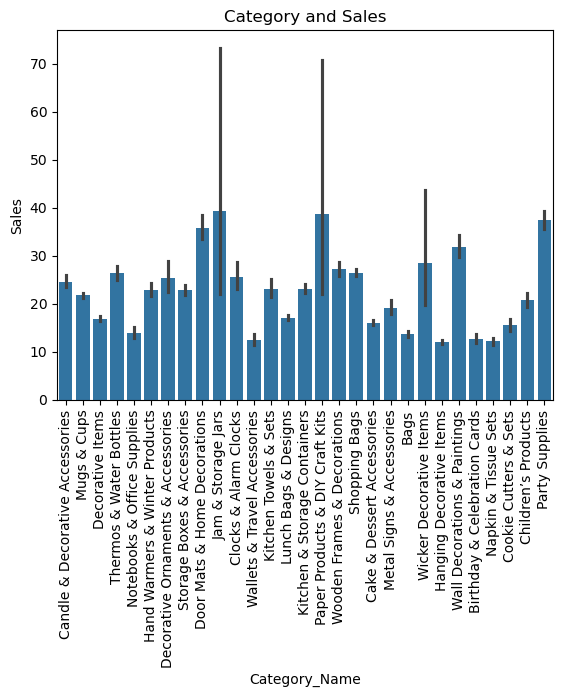

In [8]:
# figure style

plt.figure()
sns.barplot(x = "Category_Name", y = "Sales", data = data)

plt.xticks(rotation = 90)
plt.title("Category and Sales")


In [9]:
# Tarih formatına çevir
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

# Satış Tutarı (Total Sales) Kolonu Oluştur
data["TotalSales"] = data["Quantity"] * data["UnitPrice"]


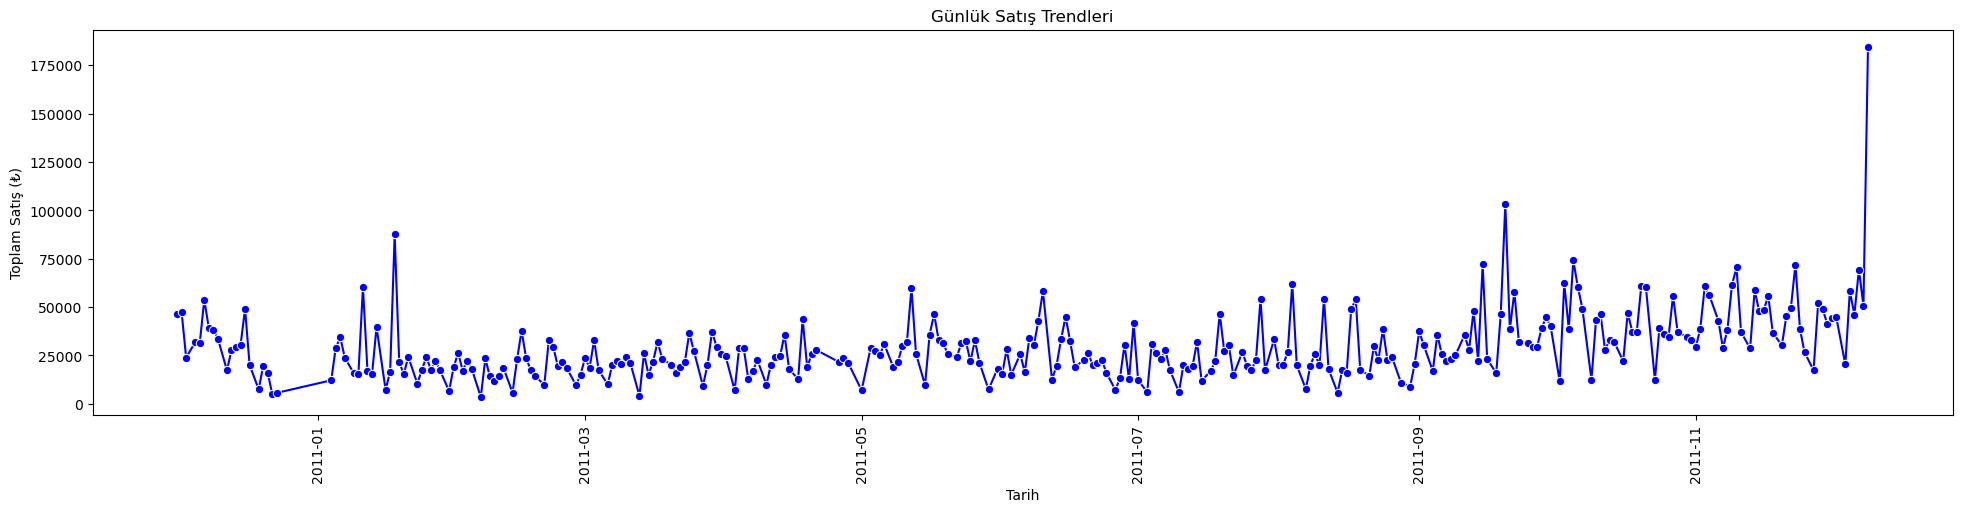

In [10]:
# Günlük Satışları Hesapla
daily_sales = data.groupby(data["InvoiceDate"].dt.date)["TotalSales"].sum()

# Çizgi Grafiği
plt.figure(figsize=(24, 5))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, marker="o", color="b")
plt.xticks(rotation=90)
plt.title("Günlük Satış Trendleri")
plt.xlabel("Tarih")
plt.ylabel("Toplam Satış (₺)")
plt.show()


C:\Users\EXCALIBUR\AppData\Local\Temp\ipykernel_3484\4256325857.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='InvoiceDate')["TotalSales"].sum()


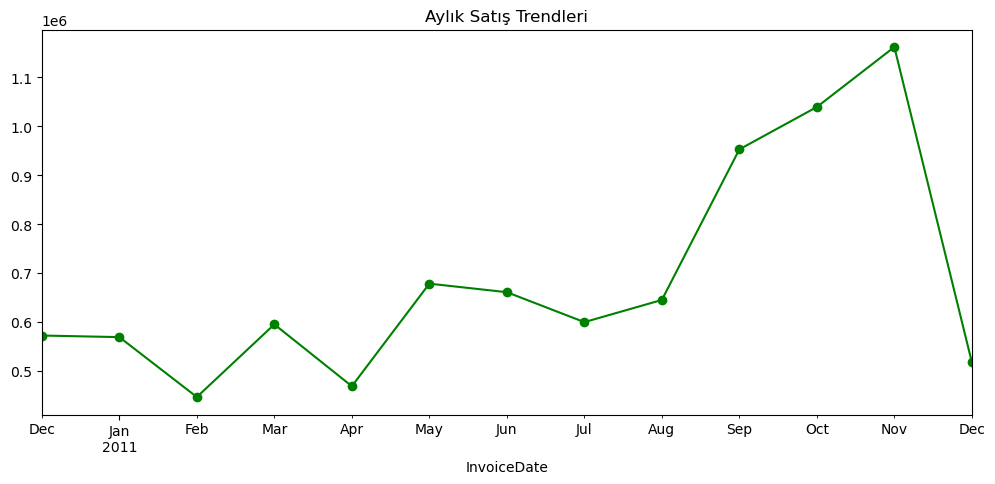

In [11]:
monthly_sales = data.resample('M', on='InvoiceDate')["TotalSales"].sum()
monthly_sales.plot(kind='line', figsize=(12,5), marker='o', color='g', title="Aylık Satış Trendleri")
plt.show()


C:\Users\EXCALIBUR\AppData\Local\Temp\ipykernel_3484\2724233986.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=country_sales.values, palette="viridis")


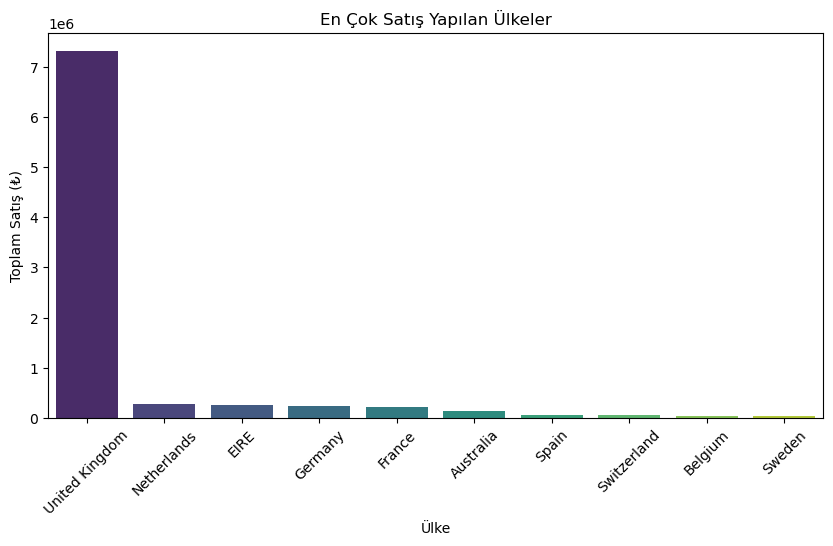

In [12]:
# Ülkeler bazında satışlar
country_sales = data.groupby("Country")["TotalSales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=country_sales.index, y=country_sales.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("En Çok Satış Yapılan Ülkeler")
plt.xlabel("Ülke")
plt.ylabel("Toplam Satış (₺)")
plt.show()


C:\Users\EXCALIBUR\AppData\Local\Temp\ipykernel_3484\2823448746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_sales.index, y=customer_sales.values, palette="magma")


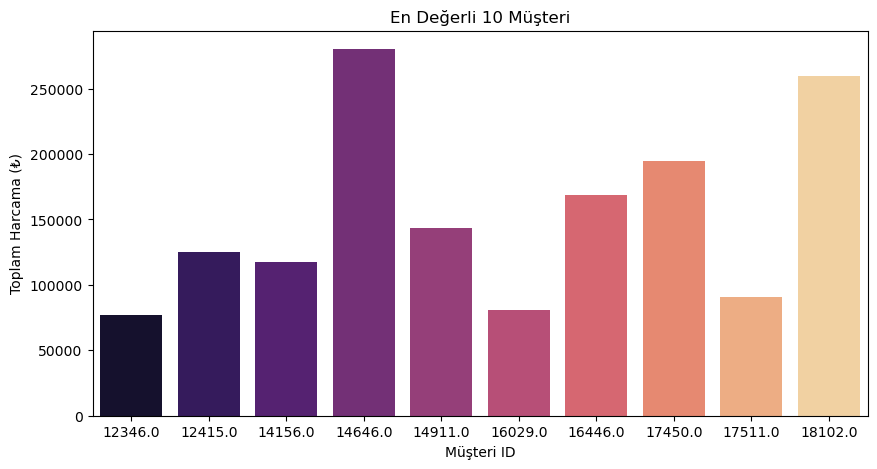

In [13]:
# Satışların büyük kısmını oluşturan en iyi müşterileri görmek için:

customer_sales = data.groupby("CustomerID")["TotalSales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=customer_sales.index, y=customer_sales.values, palette="magma")
plt.title("En Değerli 10 Müşteri")
plt.xlabel("Müşteri ID")
plt.ylabel("Toplam Harcama (₺)")
plt.show()


C:\Users\EXCALIBUR\AppData\Local\Temp\ipykernel_3484\2718220850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")


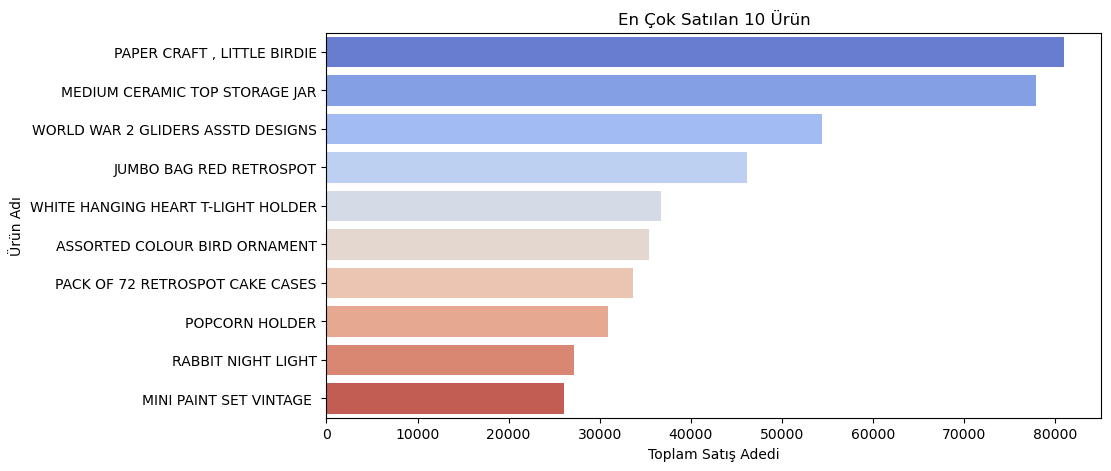

In [14]:
top_products = data.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.title("En Çok Satılan 10 Ürün")
plt.xlabel("Toplam Satış Adedi")
plt.ylabel("Ürün Adı")
plt.show()


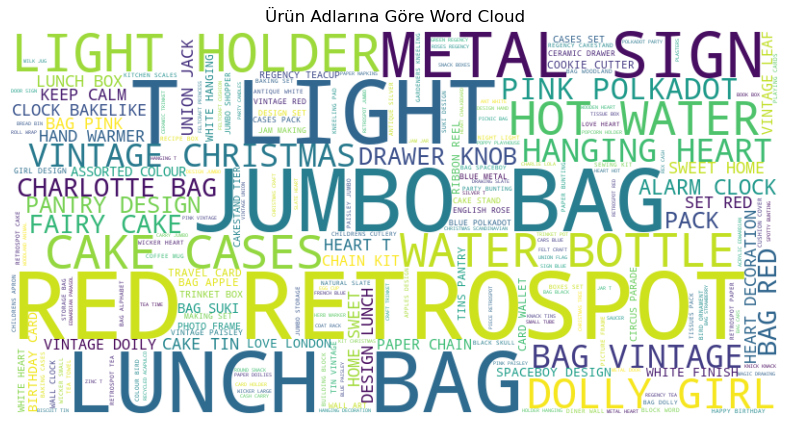

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(data["Description"].dropna()))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Ürün Adlarına Göre Word Cloud")
plt.show()


In [16]:
data2 = pd.read_csv("RFM.csv")
data2.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,12346.0,326,1,77183.60,1,1,5,115,Big Spender
1,12347.0,2,7,4310.00,5,5,5,555,VIP Customer
2,12348.0,75,4,1797.24,2,4,4,244,Mid-Level Customer
3,12349.0,19,1,1757.55,4,1,4,414,Mid-Level Customer
4,12350.0,310,1,334.40,1,1,2,112,Lost Customer


In [17]:
merged_data = pd.read_csv("merged_data.csv")
merged_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Category_Name,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Candle & Decorative Accessories,372,34,5391.21,1,5,5,155,Frequent Shopper
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Mugs & Cups,372,34,5391.21,1,5,5,155,Frequent Shopper
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Decorative Items,372,34,5391.21,1,5,5,155,Frequent Shopper
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Thermos & Water Bottles,372,34,5391.21,1,5,5,155,Frequent Shopper
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Decorative Items,372,34,5391.21,1,5,5,155,Frequent Shopper


In [18]:
# Ülkelere ve segmentlere göre sayıları hesapla
country_segment_counts = merged_data.groupby(['Country', 'Segment']).size().unstack().fillna(0)

# Ülkelere göre segment ağırlığını normalize et
country_segment_normalized = country_segment_counts.div(country_segment_counts.sum(axis=1), axis=0)


<Figure size 1200x800 with 0 Axes>

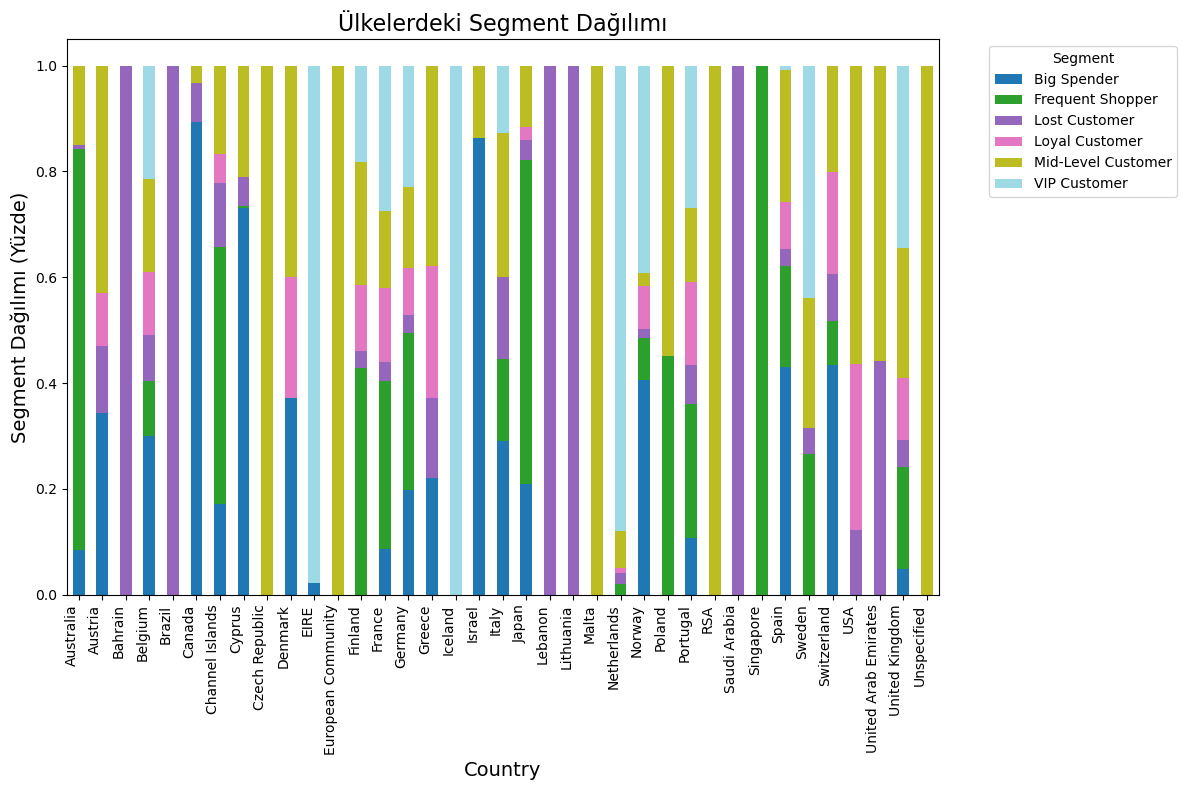

In [19]:
# Yığılmış çubuk grafiği (stacked bar chart)
plt.figure(figsize=(12, 8))
country_segment_normalized.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="tab20")

# Başlık ve etiketler
plt.title("Ülkelerdeki Segment Dağılımı", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Segment Dağılımı (Yüzde)", fontsize=14)
plt.xticks(rotation=90, ha="right")
plt.legend(title="Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

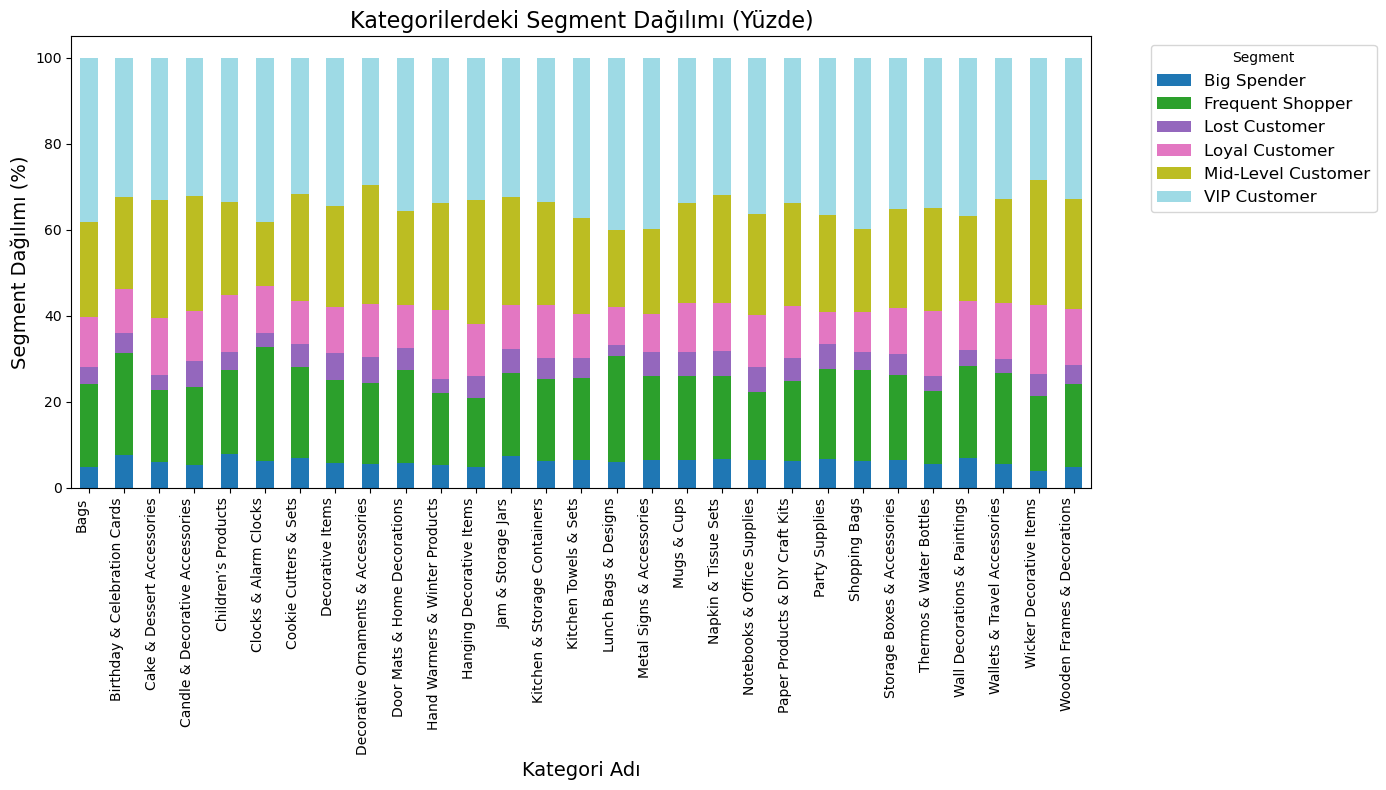

In [20]:
# Kategorilere ve segmentlere göre sayıları hesapla
categories_segment_counts = merged_data.groupby(['Category_Name', 'Segment']).size().unstack().fillna(0)

# Kategorilere göre segment ağırlığını normalize et (yüzde olarak)
categories_segment_counts = categories_segment_counts.div(categories_segment_counts.sum(axis=1), axis=0) * 100

# Yığılmış çubuk grafiği (stacked bar chart)
plt.figure(figsize=(14, 8))
categories_segment_counts.plot(kind='bar', stacked=True, colormap="tab20", figsize=(14, 8))

# Başlık ve etiketler
plt.title("Kategorilerdeki Segment Dağılımı (Yüzde)", fontsize=16)
plt.xlabel("Kategori Adı", fontsize=14)
plt.ylabel("Segment Dağılımı (%)", fontsize=14)
plt.xticks(rotation=90, ha="right")
plt.legend(title="Segment", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()
